In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing as mp
from multiprocessing import Pool
import re
from collections import Counter
import time
import os
from functools import partial

In [135]:
l = os.listdir("CSVs")

In [136]:
filters = list(filter(lambda x: 'Filter' in x, l))
filters.sort()
qcs = list(filter(lambda x: 'QC' in x, l))
samples = list(filter(lambda x: 'Sample' in x, l))

In [137]:
f = [pd.read_csv('CSVs/%s' % i) for i in filters]

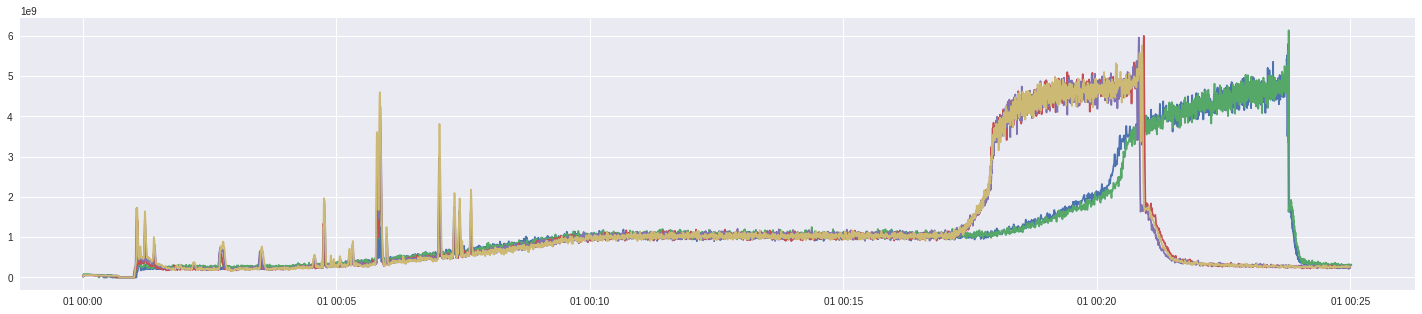

In [142]:
plt.figure(figsize=(25, 5))
plt.style.use('seaborn')
for f0 in f:
    rts = pd.to_datetime(f0['rt'].unique())
    maxint = f0.groupby('rt')['intensity'].max().values
    plt.plot(list(rts), maxint)

In [139]:
def sub_chr(df, left_right, ax=None, **kwargs):
    if not ax:
        ax = plt.gca()
    left, right = left_right
    rts = pd.to_datetime(df['rt'].unique())
    indices = (rts > pd.to_datetime(left, unit='s')) & \
              (rts < pd.to_datetime(right, unit='s'))
    
    rts = rts[indices]
    intensities = df.groupby('rt')['intensity'].max().values[indices]
    ax.fill_between(rts, intensities, **kwargs)

In [121]:
cmap(1)

(0.4154555940023068, 0.003690888119953864, 0.12341407151095732, 1.0)

In [128]:
cmap = plt.get_cmap('RdBu', 5)
cmap.N

5

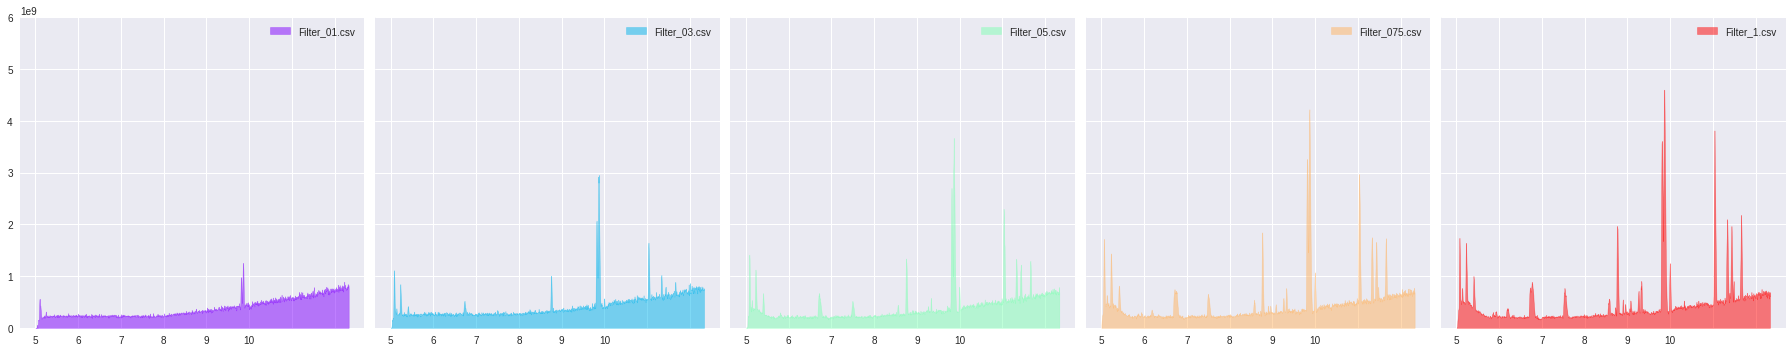

In [146]:
fig, ax = plt.subplots(1, 5, figsize=(25, 5))
cmap = plt.get_cmap('rainbow', 5)
plt.style.use('bmh')
for i in range(5):
    ax0 = ax[i]
    sub_chr(f[i], (60, 500), ax0, label=filters[i], color=cmap(i), alpha=.5)
    ax0.legend()
    ax0.set_xticklabels([5, 6, 7, 8, 9, 10])
    ax0.set_ylim(0, 6e9)
    if i > 0:
        ax0.set_yticklabels([])
plt.tight_layout()